# Aula 1 - Python em Aplicações ambientais

Importar pandas para ler o arquivo .CSV

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\marcos perrude\Documents\ENS410064\dados\PRcsv.csv", encoding='latin1')


In [105]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia


In [4]:
df.dtypes

Ano          int64
Mes          int64
Dia          int64
Hora         int64
Minuto       int64
Estacao     object
Codigo      object
Poluente    object
Valor       object
Unidade     object
Tipo        object
Testacao    object
dtype: object

Transformar a coluna 'Valor' em Float e retirar as cedulas com 'insufic'

In [119]:
df['Valor'] = df['Valor'].replace(['insufic'], np.nan)
df['Valor'] = df['Valor'].astype('float')

In [6]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia


In [7]:
df.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [8]:
df.describe()

,Ano,Mes,Dia,Hora,Minuto,Valor
count,262110.0,262110.000000,262110.000000,262110.000000,262110.0,181817.000000
mean,2023.0,6.511617,15.680325,11.498684,0.0,12.651441
std,0.0,3.440920,8.772784,6.922897,0.0,16.180363
min,2023.0,1.000000,1.000000,0.000000,0.0,0.000000
25%,2023.0,4.000000,8.000000,5.000000,0.0,1.640000
50%,2023.0,7.000000,16.000000,11.000000,0.0,7.480000
75%,2023.0,10.000000,23.000000,17.000000,0.0,17.250000
max,2023.0,12.000000,31.000000,23.000000,0.0,239.630000


Perguntas : 
A - Qual a média da sua série de dados? r:  12.651441

B - Qual o valor do meio (percentil 50%)? r: 7,48

C- Qual a faixa de valores entre os percentis 25% e 75%? r: Faixa de valores de 1.64(25%) ate 17.25(75%)

Criando um Datetime com as colunas ano, mes, dia e hora

In [9]:
df['datetime'] = pd.to_datetime(df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')

In [10]:
df = df.set_index("datetime")

In [11]:
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 20:00:00,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
2023-12-30 21:00:00,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
2023-12-30 22:00:00,2023,12,30,22,0,SIX,PR_013,SO2,NaN,ppb,Automatico,referencia


Filtrando apenas os poluentes da estação PR_012

In [12]:
df_PR012= df.query('Codigo == "PR_012"')

In [13]:
df_PR012

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 20:00:00,2023,12,30,20,0,CIC,PR_012,PM10,30.69,µg/m3,Automatico,referencia
2023-12-30 21:00:00,2023,12,30,21,0,CIC,PR_012,PM10,30.40,µg/m3,Automatico,referencia
2023-12-30 22:00:00,2023,12,30,22,0,CIC,PR_012,PM10,NaN,µg/m3,Automatico,referencia


In [14]:
df_PR012['Poluente']

datetime
2023-01-01 00:00:00      CO
2023-01-01 01:00:00      CO
2023-01-01 02:00:00      CO
2023-01-01 03:00:00      CO
2023-01-01 04:00:00      CO
                       ... 
2023-12-30 20:00:00    PM10
2023-12-30 21:00:00    PM10
2023-12-30 22:00:00    PM10
2023-12-30 23:00:00    PM10
2023-12-31 00:00:00    PM10
Name: Poluente, Length: 34948, dtype: object

In [15]:
d = df_PR012.groupby('Poluente').count()
print(d)

           Ano   Mes   Dia  Hora  Minuto  Estacao  Codigo  Valor  Unidade  \
Poluente                                                                    
CO        8737  8737  8737  8737    8737     8737    8737   7123     8737   
NO2       8737  8737  8737  8737    8737     8737    8737   7101     8737   
PM10      8737  8737  8737  8737    8737     8737    8737   6748     8737   
PM25      8737  8737  8737  8737    8737     8737    8737   7031     8737   

          Tipo  Testacao  
Poluente                  
CO        8737      8737  
NO2       8737      8737  
PM10      8737      8737  
PM25      8737      8737  


In [16]:
df_co = df_PR012.query('Poluente =="CO"')
df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')
df_co.head()

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia


In [17]:
df_pm10.head()

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,PM10,32.0,µg/m3,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,PM10,49.0,µg/m3,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,PM10,34.0,µg/m3,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,PM10,14.0,µg/m3,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,PM10,10.0,µg/m3,Automatico,referencia


In [50]:
df_PM25.head()

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,PM25,13.43,µg/m3,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,PM25,16.53,µg/m3,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,PM25,16.65,µg/m3,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,PM25,12.97,µg/m3,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,PM25,8.15,µg/m3,Automatico,referencia


In [18]:
df_co.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\3651329539.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


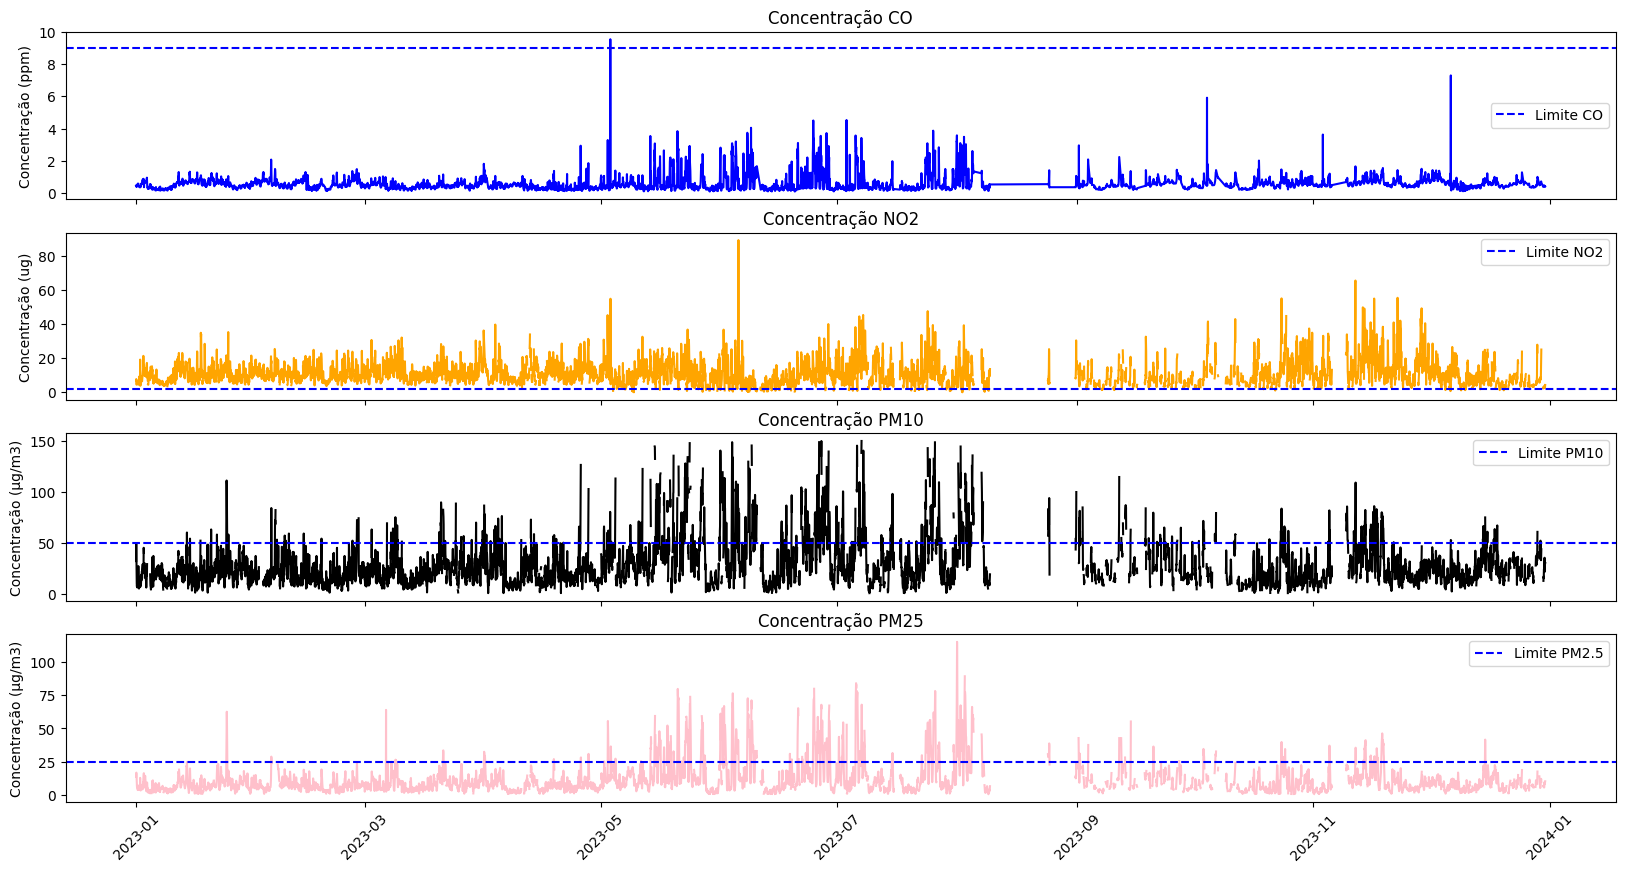

In [52]:
fig,ax = plt.subplots(4,sharex=True, figsize = (20,10))
ax[0].plot(df_co.index,df_co['Valor'],color = 'blue')
ax[1].plot(df_no2.index,df_no2['Valor'],color='orange')
ax[2].plot(df_pm10.index,df_pm10['Valor'],color='black')
ax[3].plot(df_PM25.index,df_PM25['Valor'],color='pink')
ax[3].tick_params(axis='x', rotation=45)

plt.legend()

ax[0].axhline(y= 9, color='blue', linestyle='--', label='Limite CO')
ax[1].axhline(y=2, color='blue', linestyle='--', label='Limite NO2')
ax[2].axhline(y=50, color='blue', linestyle='--', label='Limite PM10')
ax[3].axhline(y=25, color='blue', linestyle='--', label='Limite PM2.5')

ax[0].set_title('Concentração CO')
ax[0].set_ylabel('Concentração (ppm)')
ax[0].set_label('Concentração de CO na estação PR_012 em 2023')
ax[0].legend()

ax[1].set_title('Concentração NO2')
ax[1].set_ylabel('Concentração (ug)')
ax[1].set_label('Concentração de NO2 na estação PR_012 em 2023')
ax[1].legend()

ax[2].set_title('Concentração PM10')
ax[2].set_ylabel('Concentração (µg/m3)')
ax[2].set_label('Concentração de PM10 na estação PR_012 em 2023')
ax[2].legend()

ax[3].set_title('Concentração PM25')
ax[3].set_ylabel('Concentração (µg/m3)')
ax[3].set_label('Concentração de PM25 na estação PR_012 em 2023')
ax[3].legend()

plt.show()

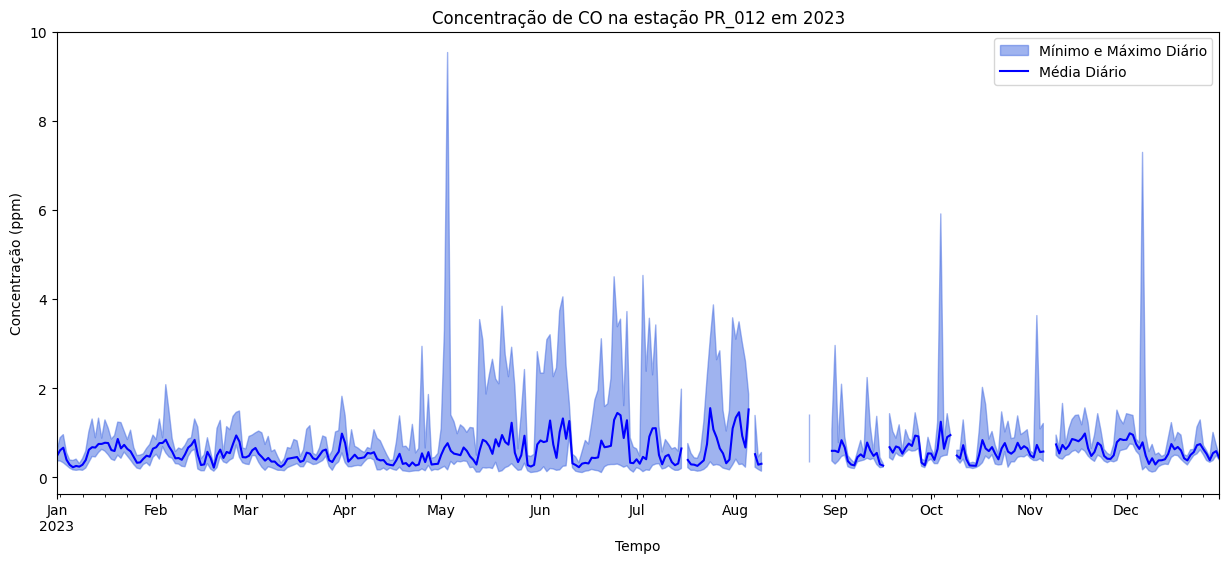

In [37]:
# Calcula a média, mínima e máxima diária
media_diaria_co = df_co['Valor'].resample('D').mean()  #Resample('D'),reamostrar os dados em uma base diária e calculua a media
min_diaria_co = df_co['Valor'].resample('D').min()
max_diaria_co = df_co['Valor'].resample('D').max()

# Plota os dados
plt.figure(figsize=(15, 6))

# Área sombreada entre os valores mínimo e máximo
plt.fill_between(min_diaria_co.index, min_diaria_co, max_diaria_co, color='royalblue', alpha=0.5, label='Mínimo e Máximo Diário')

# Plota a média diária
media_diaria_co.plot(color='blue', legend=True, label='Média Diário')


# Configurações do gráfico
plt.xlabel('Tempo')
plt.ylabel('Concentração (ppm)')
plt.title('Concentração de CO na estação PR_012 em 2023')
plt.legend()
plt.show()

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\2621035734.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co.dropna(subset=['Valor'], inplace=True)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\2621035734.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co.dropna(subset=['Valor'], inplace=True)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\2621035734.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

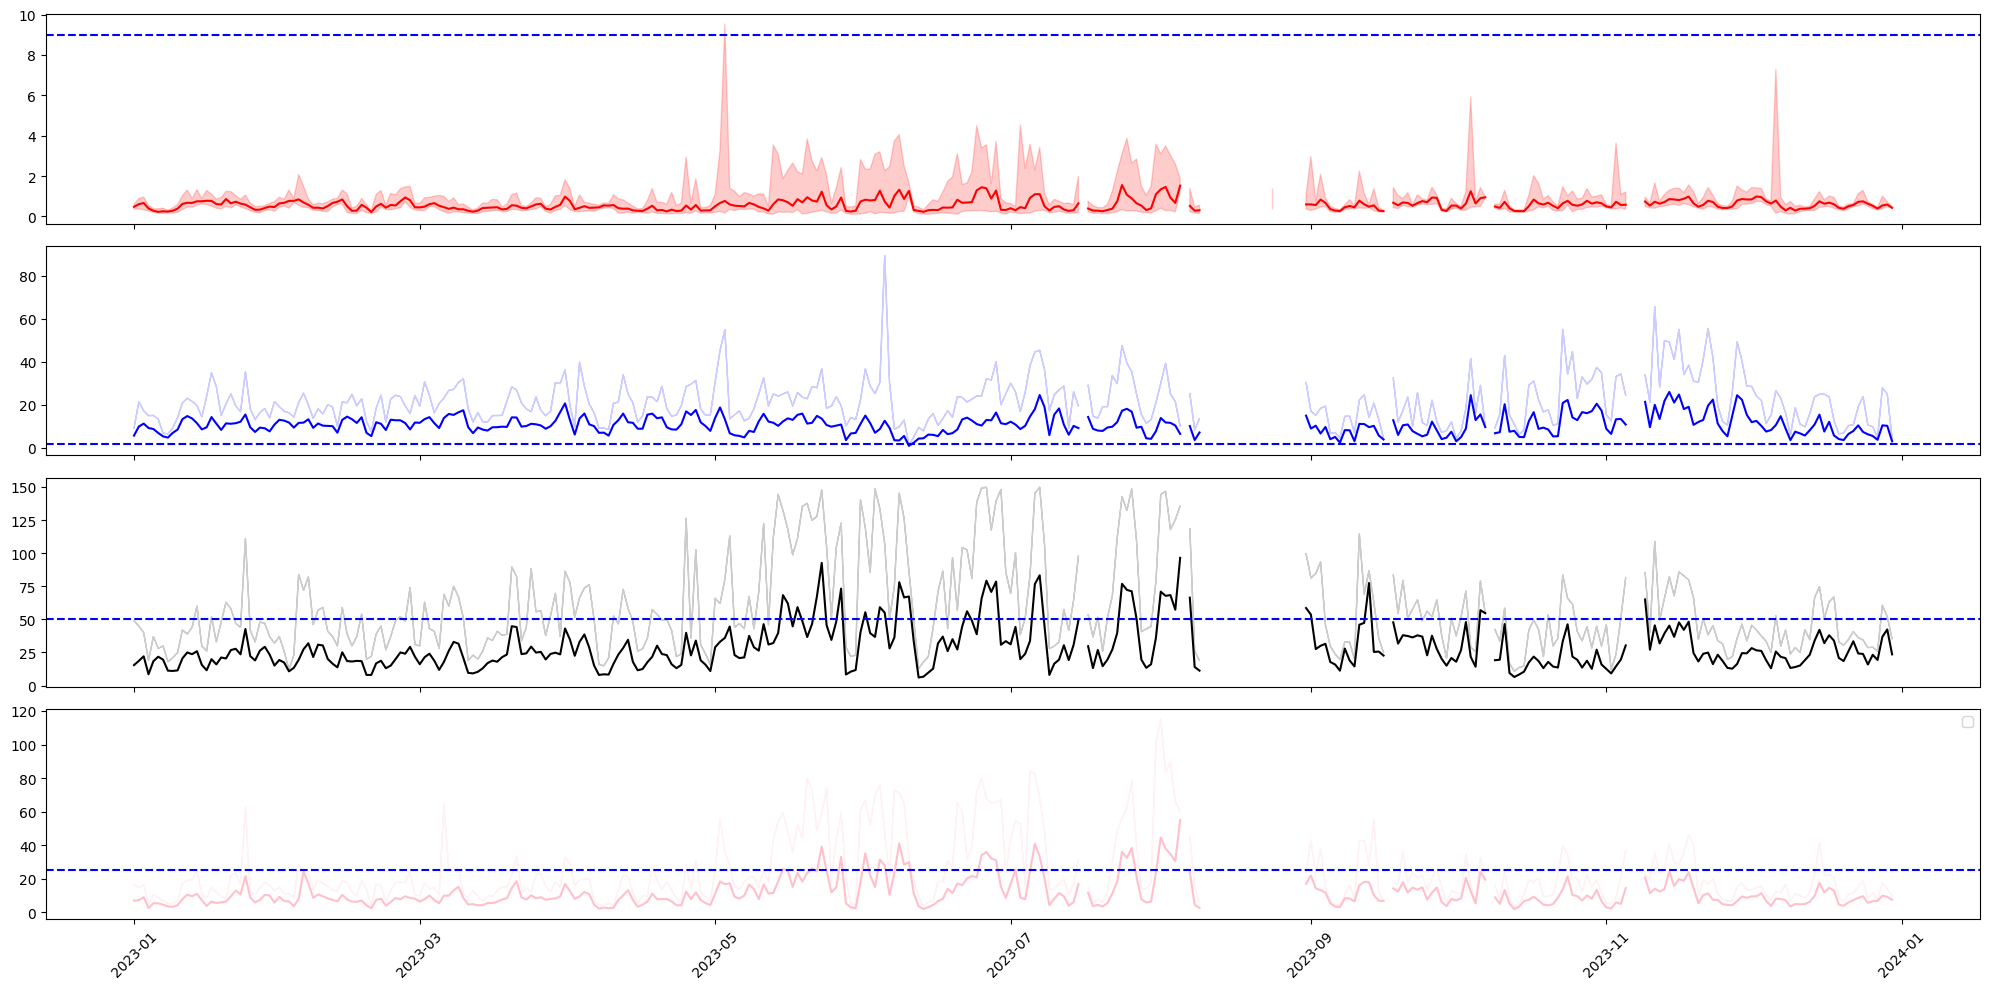

In [76]:
# Nao simplificado
df_co = df_PR012.query('Poluente =="CO"')
df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')

df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')
df_co.head()

# Calcula a média, mínima e máxima diária
df_co.dropna(subset=['Valor'], inplace=True)
media_diaria_co = df_co['Valor'].resample('D').mean()
min_diaria_co = df_co['Valor'].resample('D').min()
max_diaria_co = df_co['Valor'].resample('D').max()

# Calcula a média, mínima e máxima diária
df_co.dropna(subset=['Valor'], inplace=True)
media_diaria_no2 = df_no2['Valor'].resample('D').mean()
min_diaria_no2 = df_no2['Valor'].resample('D').min()
min_diaria_no2 = df_no2['Valor'].resample('D').max()

# Calcula a média, mínima e máxima diária
df_co.dropna(subset=['Valor'], inplace=True)
media_diaria_pm10 = df_pm10['Valor'].resample('D').mean()
min_diaria_pm10 = df_pm10['Valor'].resample('D').min()
min_diaria_pm10 = df_pm10['Valor'].resample('D').max()

# Calcula a média, mínima e máxima diária
df_co.dropna(subset=['Valor'], inplace=True)
media_diaria_PM25 = df_PM25['Valor'].resample('D').mean()
min_diaria_PM25 = df_PM25['Valor'].resample('D').min()
min_diaria_PM25 = df_PM25['Valor'].resample('D').max()


fig,ax = plt.subplots(4, 1,sharex=True,figsize = (20,10))

ax[0].plot(media_diaria_co.index,media_diaria_co,color='red')
ax[0].fill_between(media_diaria_co.index, min_diaria_co, max_diaria_co, color='red', alpha=0.2)

ax[1].plot(media_diaria_no2.index,media_diaria_no2,color='blue')
ax[1].fill_between(media_diaria_no2.index, min_diaria_no2, min_diaria_no2, color='blue', alpha=0.2)

ax[2].plot(media_diaria_pm10.index,media_diaria_pm10,color='black')
ax[2].fill_between(media_diaria_pm10.index, min_diaria_pm10, min_diaria_pm10, color='black', alpha=0.2)

ax[3].plot(media_diaria_PM25.index,media_diaria_PM25,color='pink')
ax[3].fill_between(media_diaria_PM25.index, min_diaria_PM25, min_diaria_PM25, color='pink', alpha=0.2)


ax[3].tick_params(axis='x', rotation=45)

plt.legend()

ax[0].axhline(y= 9, color='blue', linestyle='--', label='Limite CO')
ax[1].axhline(y=2, color='blue', linestyle='--', label='Limite NO2')
ax[2].axhline(y=50, color='blue', linestyle='--', label='Limite PM10')
ax[3].axhline(y=25, color='blue', linestyle='--', label='Limite PM2.5')

plt.tight_layout()
plt.show()


- Simplificado

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\1119974801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Valor'], inplace=True)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\1119974801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Valor'], inplace=True)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\1119974801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

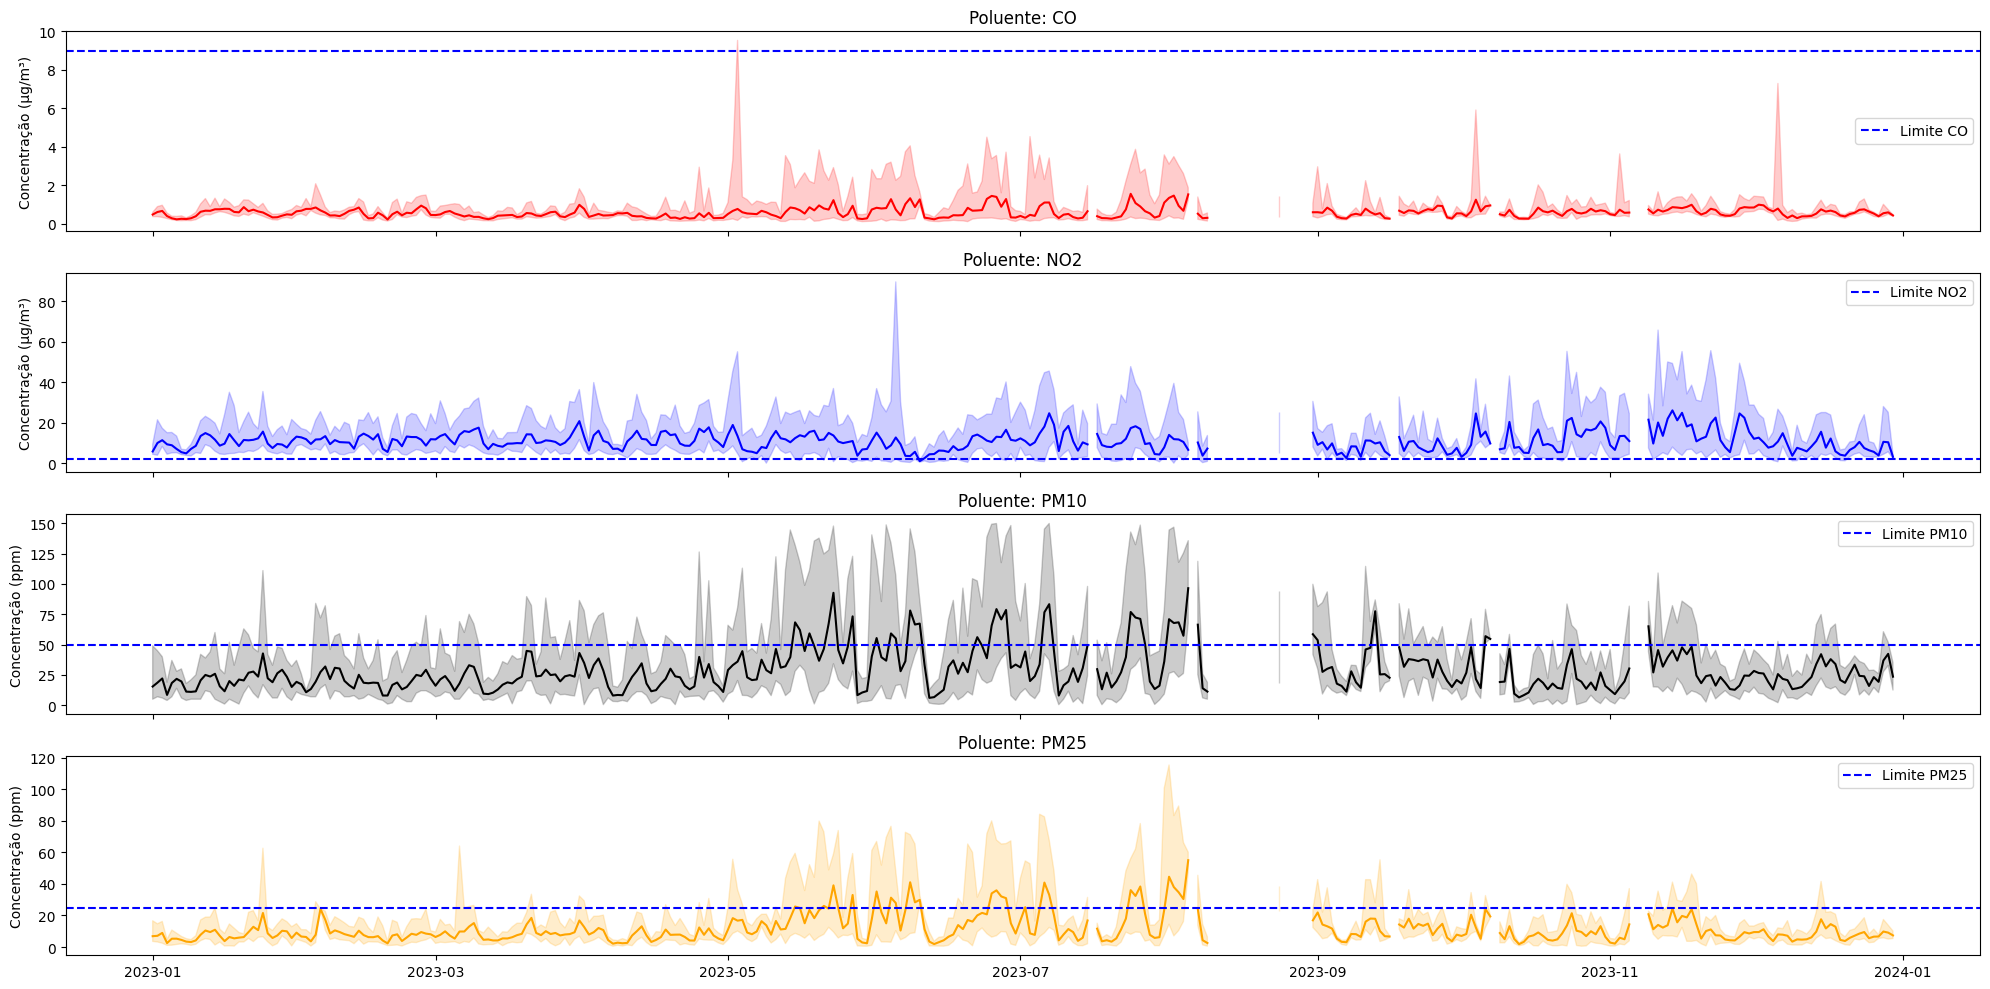

In [33]:

# Filtra os dados por poluente
poluentes = ['CO', 'NO2', 'PM10', 'PM25']
dfs = {poluente: df_PR012.query(f'Poluente == "{poluente}"') for poluente in poluentes}

# Calcula a média, mínima e máxima diária para cada poluente
resultados = {}
for poluente, df in dfs.items():  #um dicionário (dfs) armazena os DataFrames filtrados por poluente.
    df.dropna(subset=['Valor'], inplace=True)
    media_diaria = df['Valor'].resample('D').mean()
    min_diaria = df['Valor'].resample('D').min()
    max_diaria = df['Valor'].resample('D').max()
    resultados[poluente] = (media_diaria, min_diaria, max_diaria)

# Criar os subplots
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(20, 10))

# Cores e limites para cada poluente
cores = ['red', 'blue', 'black', 'orange']
limites = [9, 2, 50, 25]

#Criar um loop
for i, poluente in enumerate(poluentes): #para indice i, dentro do indice de poluentes    
    media_diaria, min_diaria, max_diaria = resultados[poluente]
    ax[i].plot(media_diaria.index, media_diaria, color=cores[i])
    ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=cores[i], alpha=0.2)
    ax[i].axhline(y=limites[i], color='blue', linestyle='--', label=f'Limite {poluente}')
    ax[i].legend()

    ax[i].set_title(f'Poluente: {poluente}')
    if poluente in ['PM10', 'PM25']:
        ax[i].set_ylabel('Concentração (ppm)')
    else:
        ax[i].set_ylabel('Concentração (µg/m³)')
    ax[i].legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()



In [55]:
df_co

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:00:00,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
2023-01-01 01:00:00,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2023-01-01 02:00:00,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
2023-01-01 03:00:00,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
2023-01-01 04:00:00,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 17:00:00,2023,12,30,17,0,CIC,PR_012,CO,0.43,ppm,Automatico,referencia
2023-12-30 18:00:00,2023,12,30,18,0,CIC,PR_012,CO,0.43,ppm,Automatico,referencia
2023-12-30 19:00:00,2023,12,30,19,0,CIC,PR_012,CO,0.42,ppm,Automatico,referencia


In [110]:
print(df[(df['Codigo'] == 'PR_012') & (df['Poluente'] == 'CO')].head())

    Ano  Mes  Dia  Hora  Minuto Estacao  Codigo Poluente Valor Unidade  \
0  2023    1    1     0       0     CIC  PR_012       CO  0.48     ppm   
1  2023    1    1     1       0     CIC  PR_012       CO  0.49     ppm   
2  2023    1    1     2       0     CIC  PR_012       CO  0.45     ppm   
3  2023    1    1     3       0     CIC  PR_012       CO  0.38     ppm   
4  2023    1    1     4       0     CIC  PR_012       CO  0.41     ppm   

         Tipo    Testacao  
0  Automatico  referencia  
1  Automatico  referencia  
2  Automatico  referencia  
3  Automatico  referencia  
4  Automatico  referencia  


In [114]:
dd.

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2023,12,30,20,0,CIC,PR_012,CO,0.39,ppm,Automatico,referencia
8733,2023,12,30,21,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
8734,2023,12,30,22,0,CIC,PR_012,CO,insufic,ppm,Automatico,referencia
8735,2023,12,30,23,0,CIC,PR_012,CO,insufic,ppm,Automatico,referencia


,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,0,CIC,PR_012,CO,0.48,ppm,Automatico,referencia
1,2023,1,1,1,0,CIC,PR_012,CO,0.49,ppm,Automatico,referencia
2,2023,1,1,2,0,CIC,PR_012,CO,0.45,ppm,Automatico,referencia
3,2023,1,1,3,0,CIC,PR_012,CO,0.38,ppm,Automatico,referencia
4,2023,1,1,4,0,CIC,PR_012,CO,0.41,ppm,Automatico,referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
262105,2023,12,30,20,0,SIX,PR_013,SO2,2.88,ppb,Automatico,referencia
262106,2023,12,30,21,0,SIX,PR_013,SO2,3.27,ppb,Automatico,referencia
262107,2023,12,30,22,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia
262108,2023,12,30,23,0,SIX,PR_013,SO2,insufic,ppb,Automatico,referencia


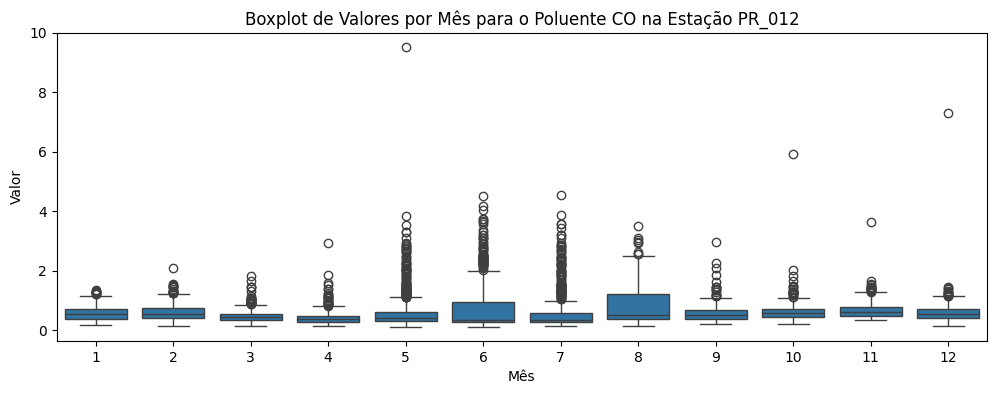

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 4))
sns.boxplot(x='Mes',y='Valor', data=df[(df['Codigo'] == 'PR_012') & (df['Poluente'] == 'CO')], ax=ax)
plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
plt.title('Boxplot de Valores por Mês para o Poluente CO na Estação PR_012')
plt.show()

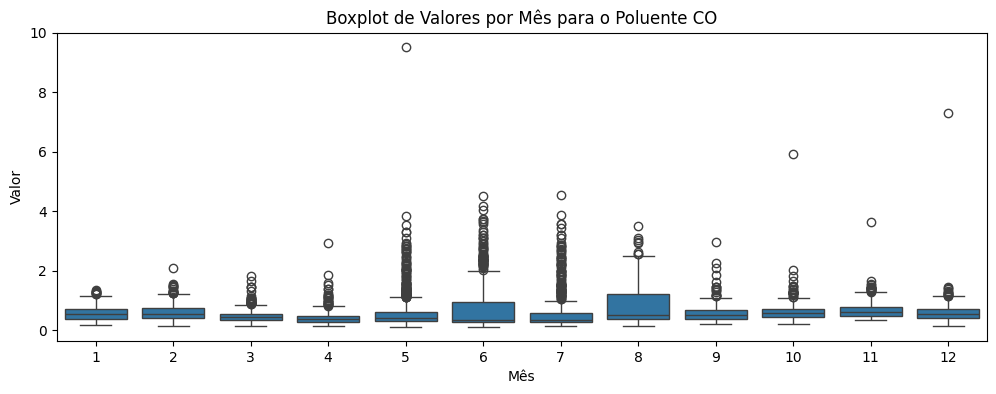

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 4))
sns.boxplot(x='Mes', y='Valor', data=df_PR012[df_PR012['Poluente'] == 'CO'], ax=ax)
plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
plt.title('Boxplot de Valores por Mês para o Poluente CO')  # Adicionar título
plt.show()

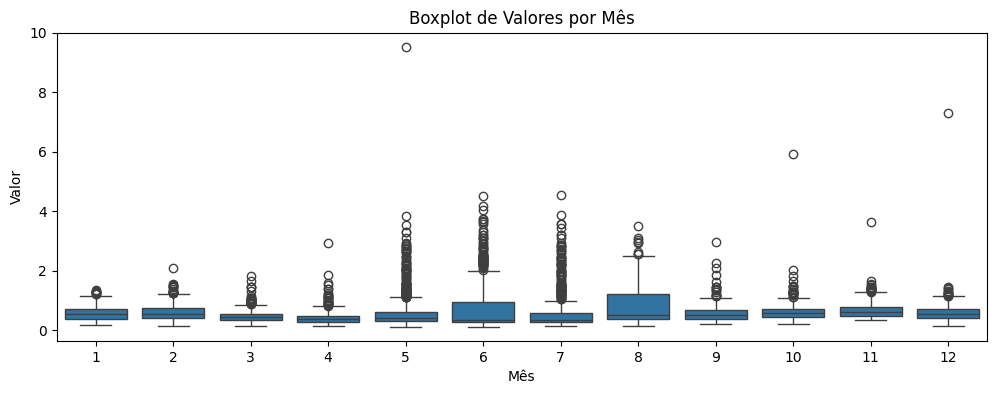

In [75]:

fig, ax = plt.subplots()
fig.set_size_inches((12, 4))
sns.boxplot(x='Mes', y='Valor', data=df_co, ax=ax)  # Usar 'Valor' como y
plt.xlabel('Mês')  # Adicionar rótulo ao eixo x
plt.ylabel('Valor')  # Adicionar rótulo ao eixo y
plt.title('Boxplot de Valores por Mês')  # Adicionar título
plt.show()

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_26564\3477878446.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_co['Valor'], patch_artist=True, labels=['M'])


Text(0.5, 0, 'Poluente')

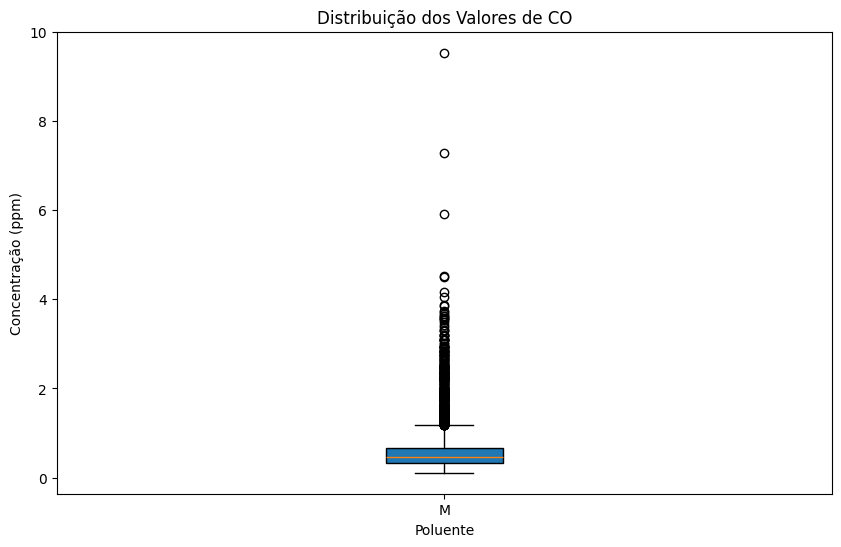

In [64]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_co['Valor'], patch_artist=True, labels=['M'])

plt.title('Distribuição dos Valores de CO')
plt.ylabel('Concentração (ppm)')
plt.xlabel('Poluente')

In [ ]:
df_co = df_PR012[df_PR012['Poluente'] == 'CO']

In [ ]:
df_co


Plotando o grafico de linha em comparação com o limite da CONAMA 491/2018 para CO

In [ ]:
media_d_co = cf_co

In [ ]:
df_co['Valor'].max()

In [ ]:
df.groupby(by = ['Codigo'])[['Valor']].mean()

In [ ]:
df.groupby(by = ['Poluente'])[['Valor']].mean()

In [ ]:
df.loc[df['Poluente'] =='SO2'] ['Valor']